<a href="https://colab.research.google.com/github/MateuszDurak/-convolutional-networks/blob/main/MWA05_s21415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WMA projekt 05 "Sieci neuronowe"
## Mateusz Durak s21415

Importy bibliotek

In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

Etykietowanie danych

In [3]:
def data_selection(y_data):
  counter = 0
  iterations = len(y_data)

  for i in range(iterations):
    if  y_data[i] == 2 or y_data[i] == 3 or y_data[i] == 4  or y_data[i] == 5  or y_data[i] == 6 or y_data[i] == 7: # zwierze
      y_data[i] = 1 # 1 - zwierze
      counter+=1
    elif y_data[i] == 0 or y_data[i] == 1 or y_data[i] == 8  or y_data[i] == 9: # Pojazd
      y_data[i] = 0 # 0 - pojazd
      counter+=1

Wczytanie, podzielenie oraz normalizacja danych

In [4]:
# Wczytanie danych i podzielenie na treningowe i testowe
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# normalizacja danych
X_train = X_train / 255.0
X_test = X_test / 255.0

classes = ['Pojazd', 'Zwierze']

# Wybieranie danych Y
data_selection(y_train)
data_selection(y_test)

170508288/170498071 [==============================] - 6s 0us/step


Wyświetlenie dannych, wraz z ekykietami.

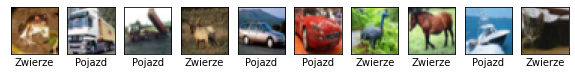

In [5]:
plt.figure(figsize = (10,10))

images_quantity = 10
for i in range(images_quantity):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i][0]])

plt.show()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Jedna warstwa

In [6]:
model_one = Sequential()
model_one.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_one.add(MaxPooling2D((2, 2)))
model_one.add(Flatten())
model_one.add(Dense(2, activation = 'softmax'))

model_one.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_one.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_train, y_train))

Epoch 1/20
782/782 [==============================] - 18s 8ms/step - loss: 0.3388 - accuracy: 0.8579 - val_loss: 0.2637 - val_accuracy: 0.8965
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2618 - accuracy: 0.8955 - val_loss: 0.3124 - val_accuracy: 0.8719
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2438 - accuracy: 0.9009 - val_loss: 0.2114 - val_accuracy: 0.9176
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2317 - accuracy: 0.9088 - val_loss: 0.2596 - val_accuracy: 0.8960
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2217 - accuracy: 0.9121 - val_loss: 0.2546 - val_accuracy: 0.8976
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2168 - accuracy: 0.9151 - val_loss: 0.2299 - val_accuracy: 0.9102
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.2100 - accuracy: 0.9167 - val_loss: 0.1888 - val_accuracy: 0.9266
Epoch

Dwie warstwy

In [7]:
model_two = Sequential()
model_two.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Conv2D(64, (3, 3), activation='tanh'))
model_two.add(MaxPooling2D((2, 2)))
model_two.add(Flatten())
model_two.add(Dense(2, activation = 'softmax'))

model_two.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_two.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_train, y_train))

Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 0.3344 - accuracy: 0.8589 - val_loss: 0.2614 - val_accuracy: 0.8937
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2584 - accuracy: 0.8967 - val_loss: 0.3374 - val_accuracy: 0.8606
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2353 - accuracy: 0.9065 - val_loss: 0.3395 - val_accuracy: 0.8583
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2221 - accuracy: 0.9124 - val_loss: 0.3263 - val_accuracy: 0.8695
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2110 - accuracy: 0.9167 - val_loss: 0.1882 - val_accuracy: 0.9260
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.2019 - accuracy: 0.9205 - val_loss: 0.2213 - val_accuracy: 0.9111
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1921 - accuracy: 0.9243 - val_loss: 0.1699 - val_accuracy: 0.9336
Epoch

Trzy warstwy

In [8]:
model_three = Sequential()
model_three.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(64, (3, 3), activation='tanh'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Conv2D(128, (3, 3), activation='sigmoid'))
model_three.add(MaxPooling2D((2, 2)))
model_three.add(Flatten())
model_three.add(Dense(2, activation = 'softmax'))

model_three.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_three.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_train, y_train))

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 0.3581 - accuracy: 0.8425 - val_loss: 0.2895 - val_accuracy: 0.8796
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2721 - accuracy: 0.8891 - val_loss: 0.2503 - val_accuracy: 0.8982
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2402 - accuracy: 0.9023 - val_loss: 0.2385 - val_accuracy: 0.9052
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2185 - accuracy: 0.9129 - val_loss: 0.1895 - val_accuracy: 0.9252
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2033 - accuracy: 0.9180 - val_loss: 0.1767 - val_accuracy: 0.9313
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1893 - accuracy: 0.9261 - val_loss: 0.1588 - val_accuracy: 0.9386
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.1762 - accuracy: 0.9306 - val_loss: 0.1622 - val_accuracy: 0.9365
Epoch 

Graf dla jednej warstwy

Jedna warstwa:
accuracy: 0.9049199819564819
loss: 0.23225876688957214


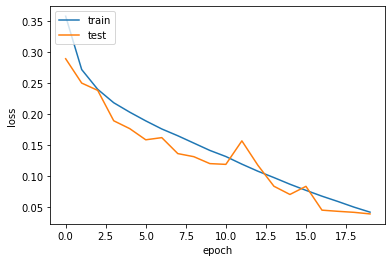

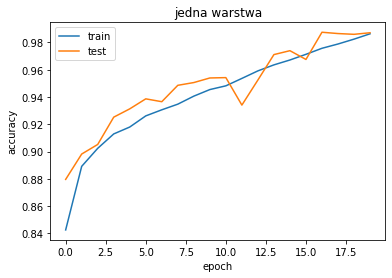

In [9]:
loss, acc = model_one.evaluate(X_train, y_train, verbose=0)
print('Jedna warstwa:')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('jedna warstwa')
plt.show()

Graf dla dwóch warstw

dwie warstwy:
accuracy: 0.9626200199127197
loss: 0.09970884025096893


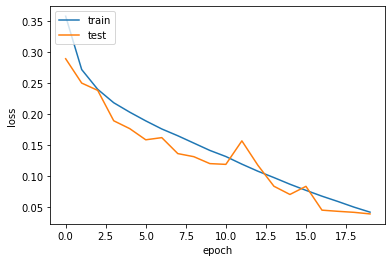

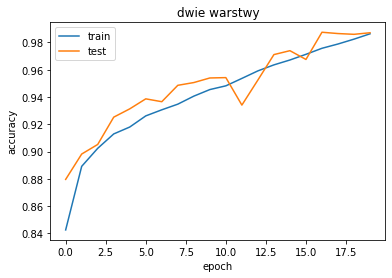

In [10]:
loss, acc = model_two.evaluate(X_train, y_train, verbose=0)
print('dwie warstwy:')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('dwie warstwy')
plt.show()

Graf dla trzech warstw

trzy warstwy:
accuracy: 0.987060010433197
loss: 0.0392010360956192


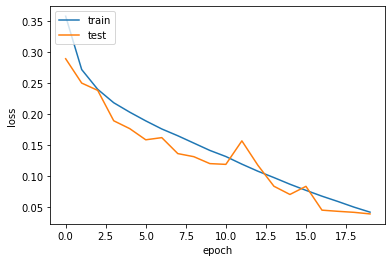

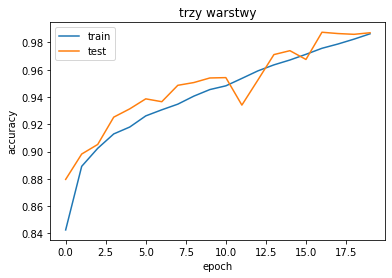

In [11]:
loss, acc = model_three.evaluate(X_train, y_train, verbose=0)
print('trzy warstwy:')
print('accuracy: {}'.format(acc))
print('loss: {}'.format(loss))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.title('trzy warstwy')
plt.show()

#**Wnioski**
Przy wykorzystaniu trzech (warst relu, tahn oraz sigmoid) otrzymałem zadawalający wynik. Dokładność na poziomie *98.7%*. Do otrzymania takiego wyniku, model potrzebował *20* epok. Znaczne zwiększenie liczby epok mogło by skutkować przetrenowaniem. Jak można zauważyć na wykresach, liczba epok bardzo wyraźnie wpływa na dokładność i straty. W celu zwiększenia wydajności wykorzystałem GPU udostępniony przez google collab
